**EDA**

Bank clients with certain features, are potential clients to place a term deposits, but offering term deposits to all of bank clients will be innefective
We need to classify which client that has a decent probability in placing a term deposits, in order to make the sales offers more effective

**Conclusion**

- 
- 
- 
- 
- 
- 
- 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('bank_marketing_campaign.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
df.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [6]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Encoding

In [8]:
df['education'] = df['education'].map({
    'illiterate' : 0,
    'basic.4y' : 1,
    'basic.6y' : 2,
    'basic.9y' : 3,
    'unknown' : 4,
    'high.school' : 5,
    'university.degree' : 6,
    'professional.course' : 7
})
df['education'] = df['education'].astype(int)


df['contact'] = df['contact'].map({
    'telephone' : 0,
    'cellular' : 1
})
df['contact'] = df['contact'].astype(int)

df['poutcome'] = df['poutcome'].map({
    'failure' : 0,
    'nonexistent' : 1,
    'success' : 2
})
df['poutcome'] = df['poutcome'].astype(int)

df['y'] = df['y'].map({
    'no' : 0,
    'yes' : 1
})
df['y'] = df['y'].astype(int)

In [9]:
dfc = pd.get_dummies(data=df, columns=['job','marital','default','housing','loan','month','day_of_week'])

In [10]:
df.corr()

,age,education,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.173225,-0.007021,-0.000866,0.004594,-0.034369,0.024365,0.019750,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
education,-0.173225,1.000000,0.105890,-0.016083,0.000352,-0.034357,0.030725,0.007141,-0.037712,-0.082581,0.054103,-0.031956,-0.030646,0.043008
contact,-0.007021,0.105890,1.000000,0.026657,-0.077368,-0.117970,0.212848,-0.118744,-0.393584,-0.591474,-0.251614,-0.399773,-0.269155,0.144773
duration,-0.000866,-0.016083,0.026657,1.000000,-0.071699,-0.047577,0.020640,0.033360,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,0.000352,-0.077368,-0.071699,1.000000,0.052584,-0.079141,0.032586,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.034357,-0.117970,-0.047577,0.052584,1.000000,-0.587514,-0.475619,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.030725,0.212848,0.020640,-0.079141,-0.587514,1.000000,-0.313110,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
poutcome,0.019750,0.007141,-0.118744,0.033360,0.032586,-0.475619,-0.313110,1.000000,0.192972,0.211330,0.178289,0.184144,0.119689,0.129789
emp.var.rate,-0.000371,-0.037712,-0.393584,-0.027968,0.150754,0.271004,-0.420489,0.192972,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,-0.082581,-0.591474,0.005312,0.127836,0.078889,-0.203130,0.211330,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211


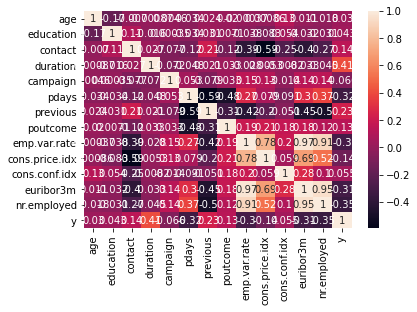

In [11]:
sns.heatmap(df.corr(), annot=True)

**Checking Data Distribution and Outliers**

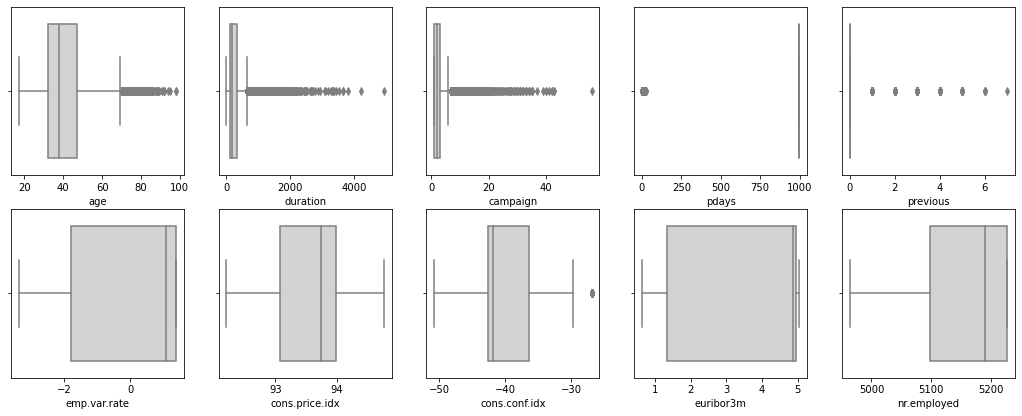

In [12]:
plt.figure(figsize=(18, 18))

plt.subplot(5,5,1)
sns.boxplot(df['age'], color='lightgrey')

plt.subplot(5,5,2)
sns.boxplot(df['duration'], color='lightgrey')

plt.subplot(5,5,3)
sns.boxplot(df['campaign'], color='lightgrey')

plt.subplot(5,5,4)
sns.boxplot(df['pdays'], color='lightgrey')

plt.subplot(5,5,5)
sns.boxplot(df['previous'], color='lightgrey')

plt.subplot(5,5,6)
sns.boxplot(df['emp.var.rate'], color='lightgrey')

plt.subplot(5,5,7)
sns.boxplot(df['cons.price.idx'], color='lightgrey')

plt.subplot(5,5,8)
sns.boxplot(df['cons.conf.idx'], color='lightgrey')

plt.subplot(5,5,9)
sns.boxplot(df['euribor3m'], color='lightgrey')

plt.subplot(5,5,10)
sns.boxplot(df['nr.employed'], color='lightgrey')

plt.show()

**Handling Outliers**

Dropping outliers is not necessary

**Checking Data Target**

Response Percentage

In [13]:
print('Age Min in Data : ',df['age'].min())
print('Age Max in Data : ',df['age'].max())

Age Min in Data :  17
Age Max in Data :  98


In [14]:
age_bin = [10, 30, 50, 65, df['age'].max()]
labels = ['Young Adult', 'Middle Age', 'Senior', 'Elder']
df['age_bin'] = pd.cut(df['age'], bins=age_bin, labels=labels)

In [15]:
df['age_bin'].value_counts()

Middle Age     26625
Young Adult     7383
Senior          6561
Elder            619
Name: age_bin, dtype: int64

In [16]:
((df[['age_bin', 'y']].groupby(['age_bin']).mean())*100).sort_values(by='y', ascending=False)

,y
age_bin,
Elder,46.849758
Young Adult,15.224164
Senior,12.071331
Middle Age,9.141784


In [17]:
(pd.crosstab(index=df['y'], columns='count', normalize=True)*100).round(2)

col_0,count
y,
0,88.73
1,11.27


In [18]:
(pd.crosstab(index=df['y'], columns=df['job'], normalize=True)*100).round(2)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
0,22.02,20.92,3.23,2.32,6.3,3.12,3.09,8.85,1.46,14.60,2.11,0.71
1,3.28,1.55,0.30,0.26,0.8,1.05,0.36,0.78,0.67,1.77,0.35,0.09


In [19]:
(pd.crosstab(index=df['y'], columns=df['marital'], normalize=True)*100).round(2)

marital,divorced,married,single,unknown
y,,,,
0,10.04,54.38,24.15,0.17
1,1.16,6.15,3.93,0.03


In [20]:
(pd.crosstab(index=df['y'], columns=df['default'], normalize=True)*100).round(2)

default,no,unknown,yes
y,,,
0,68.93,19.80,0.01
1,10.19,1.08,0.00


In [21]:
(pd.crosstab(index=df['y'], columns=df['housing'], normalize=True)*100).round(2)

housing,no,unknown,yes
y,,,
0,40.29,2.14,46.30
1,4.92,0.26,6.09


In [22]:
(pd.crosstab(index=df['y'], columns=df['loan'], normalize=True)*100).round(2)

loan,no,unknown,yes
y,,,
0,73.08,2.14,13.51
1,9.35,0.26,1.66


In [23]:
(pd.crosstab(index=df['y'], columns=df['month'], normalize=True)*100).round(2)

month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
y,,,,,,,,,,
0,5.08,13.41,0.23,15.84,11.55,0.66,31.28,8.95,0.98,0.76
1,1.31,1.59,0.22,1.58,1.36,0.67,2.15,1.01,0.76,0.62


In [24]:
(pd.crosstab(index=df['y'], columns=df['day_of_week'], normalize=True)*100).round(2)

day_of_week,fri,mon,thu,tue,wed
y,,,,,
0,16.95,18.61,18.40,17.33,17.44
1,2.05,2.06,2.54,2.31,2.30


In [25]:
(pd.crosstab(index=df['y'], columns=df['education'], normalize=True)*100).round(2)

education,0,1,2,3,4,5,6,7
y,,,,,,,,
0,0.03,9.10,5.11,13.53,3.59,20.6,25.49,11.28
1,0.01,1.04,0.46,1.15,0.61,2.5,4.05,1.44


In [26]:
(pd.crosstab(index=df['y'], columns=df['contact'], normalize=True)*100).round(2)

contact,0,1
y,,
0,34.61,54.12
1,1.91,9.35


In [27]:
(pd.crosstab(index=df['y'], columns=df['poutcome'], normalize=True)*100).round(2)

poutcome,0,1,2
y,,,
0,8.85,78.72,1.16
1,1.47,7.63,2.17


In [28]:
(pd.crosstab(index=df['y'], columns=df['emp.var.rate'], normalize=True)*100).round(2)

emp.var.rate,-3.4,-3.0,-2.9,-1.8,-1.7,-1.1,-0.2,-0.1,1.1,1.4
y,,,,,,,,,,
0,1.5,0.20,2.60,18.75,0.90,0.81,0.02,8.38,18.27,37.31
1,1.1,0.21,1.44,3.55,0.98,0.73,0.00,0.56,0.58,2.10


In [29]:
df[df['housing']=='unknown']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_bin
29,55,unknown,married,6,unknown,unknown,unknown,0,may,mon,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,Senior
81,51,blue-collar,married,1,unknown,unknown,unknown,0,may,mon,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,Senior
261,27,blue-collar,single,2,no,unknown,unknown,0,may,mon,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,Young Adult
385,59,management,married,1,unknown,unknown,unknown,0,may,tue,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,Senior
401,48,services,married,5,unknown,unknown,unknown,0,may,tue,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,Middle Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40990,31,admin.,single,6,no,unknown,unknown,1,oct,tue,...,3,1,2,-1.1,94.601,-49.5,1.008,4963.6,1,Middle Age
41014,31,technician,single,7,no,unknown,unknown,1,oct,thu,...,999,0,1,-1.1,94.601,-49.5,1.025,4963.6,1,Middle Age
41015,34,admin.,divorced,6,no,unknown,unknown,1,oct,thu,...,999,1,0,-1.1,94.601,-49.5,1.025,4963.6,0,Middle Age
41029,46,management,married,6,no,unknown,unknown,1,oct,mon,...,12,2,0,-1.1,94.601,-49.5,1.032,4963.6,0,Middle Age


In [30]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  object  
 2   marital         41188 non-null  object  
 3   education       41188 non-null  int32   
 4   default         41188 non-null  object  
 5   housing         41188 non-null  object  
 6   loan            41188 non-null  object  
 7   contact         41188 non-null  int32   
 8   month           41188 non-null  object  
 9   day_of_week     41188 non-null  object  
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  int32   
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

In [32]:
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [33]:
df['poutcome'].value_counts()

1    35563
0     4252
2     1373
Name: poutcome, dtype: int64

In [34]:
df[df['y']==1].groupby(df['month'])

In [35]:
(pd.crosstab(index=df['nr.employed'], columns=df['y'], normalize=True)*100).round(2)

y,0,1
nr.employed,,
4963.6,0.81,0.73
4991.6,0.90,0.98
5008.7,0.68,0.90
5017.5,1.50,1.10
5023.5,0.20,0.21
5076.2,2.60,1.44
5099.1,18.07,2.65
5176.3,0.02,0.00
5191.0,18.27,0.58


In [36]:
(pd.crosstab(index=df['nr.employed']==5228.1, columns=df['y'])).round(2)

y,0,1
nr.employed,,
False,21180,3774
True,15368,866


In [37]:
(pd.crosstab(index=df['nr.employed']==5228.1, columns=df['campaign'])).round(2)

campaign,1,2,3,4,5,6,7,8,9,10,...,33,34,35,37,39,40,41,42,43,56
nr.employed,,,,,,,,,,,,,,,,,,,,,
False,11672,6830,2897,1422,814,494,285,158,113,69,...,0,0,1,0,1,0,0,2,0,1
True,5970,3740,2444,1229,785,485,344,242,170,156,...,4,3,4,1,0,2,1,0,2,0


In [38]:
(pd.crosstab(index=df['nr.employed'], columns=df['campaign'])).round(2)

campaign,1,2,3,4,5,6,7,8,9,10,...,33,34,35,37,39,40,41,42,43,56
nr.employed,,,,,,,,,,,,,,,,,,,,,
4963.6,335,174,73,30,13,4,4,0,2,0,...,0,0,0,0,0,0,0,0,0,0
4991.6,420,179,86,41,17,16,6,3,2,1,...,0,0,0,0,0,0,0,0,0,0
5008.7,330,171,77,36,15,11,8,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5017.5,628,285,88,31,25,5,4,4,0,0,...,0,0,0,0,0,0,0,0,0,0
5023.5,73,46,27,10,7,5,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5076.2,923,445,162,67,31,21,8,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5099.1,3874,2262,1000,532,347,217,117,84,36,19,...,0,0,0,0,0,0,0,0,0,0
5176.3,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5191.0,3140,2254,1026,509,271,164,100,54,58,40,...,0,0,1,0,1,0,0,2,0,1


<BarContainer object of 41188 artists>

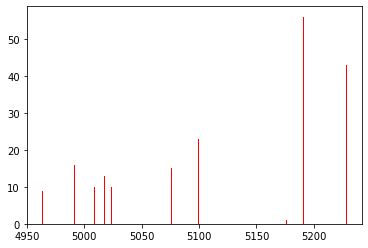

In [39]:
plt.bar(df['nr.employed'], df['campaign'], color='red')

In [40]:
employed_bin = [4963, 5017, 5099, df['nr.employed'].max()]
employed_labels = ['<5017' ,  '5017-5099', '>5099']
dfbin['nr.employed'] = pd.cut(df['nr.employed'], bins=employed_bin, labels=employed_labels)

NameError: name 'dfbin' is not defined

In [ ]:
df['nr.employed'].value_counts()